In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Selected dataset:
# Shunyi(顺义)，Changping(昌平)，Huairou(怀柔)，Aotizhongxin(奥体)，(Tiantan)天坛


# first test with Shunyi data 
data = pd.read_csv('data/PRSA_Data_Shunyi_20130301-20170228.csv', index_col=['No'])
data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi


In [47]:
import math
def RHcovert(templist,dewlist):
    rh=[]
    for temp,dew in zip(templist,dewlist):
        rh.append(math.exp(17.27*dew/(237.7+dew)-17.27*temp/(237.7+temp)))
    return rh

In [55]:
# let's focus on PM2.5
data2 = data.drop(columns=['PM10', 'SO2', 'NO2', 'CO', 'O3', 'station'])
data2["RH"]=RHcovert(data2["TEMP"],data2["DEWP"])
data2 = data2.drop(columns=['TEMP', 'PRES', 'DEWP'])
data2

,year,month,day,hour,PM2.5,RAIN,wd,WSPM,RH
No,,,,,,,,,
1,2013,3,1,0,3.0,0.0,NW,9.3,0.209222
2,2013,3,1,1,12.0,0.0,NW,9.4,0.197983
3,2013,3,1,2,14.0,0.0,NW,8.6,0.178054
4,2013,3,1,3,12.0,0.0,NW,6.6,0.178550
5,2013,3,1,4,12.0,0.0,NW,4.5,0.189187
...,...,...,...,...,...,...,...,...,...
35060,2017,2,28,19,27.0,0.0,W,1.8,0.188669
35061,2017,2,28,20,47.0,0.0,NW,1.5,0.238267
35062,2017,2,28,21,18.0,0.0,NE,1.7,0.199573


In [56]:
# drop NA
data3 = data2.dropna()
data3

,year,month,day,hour,PM2.5,RAIN,wd,WSPM,RH
No,,,,,,,,,
1,2013,3,1,0,3.0,0.0,NW,9.3,0.209222
2,2013,3,1,1,12.0,0.0,NW,9.4,0.197983
3,2013,3,1,2,14.0,0.0,NW,8.6,0.178054
4,2013,3,1,3,12.0,0.0,NW,6.6,0.178550
5,2013,3,1,4,12.0,0.0,NW,4.5,0.189187
...,...,...,...,...,...,...,...,...,...
35060,2017,2,28,19,27.0,0.0,W,1.8,0.188669
35061,2017,2,28,20,47.0,0.0,NW,1.5,0.238267
35062,2017,2,28,21,18.0,0.0,NE,1.7,0.199573


In [57]:
# combine year month day hour together
def padding(x):
    """Padding function for month/day/hour (e.g. 1 -> 01)
    :param x:original month/day (single/double digit, int)
    :return string of month/day (double digit)
    """
    return str(x) if x >= 10 else '0' + str(x)

data3['date'] = data3.apply(lambda x: str(x.year)+'-'+padding(x.month)+'-'+padding(x.day)+' '+padding(x.hour)+':00:00', axis=1)
data3

C:\StudySoftware\Anaconda\envs\info6105_new\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,year,month,day,hour,PM2.5,RAIN,wd,WSPM,RH,date
No,,,,,,,,,,
1,2013,3,1,0,3.0,0.0,NW,9.3,0.209222,2013-03-01 00:00:00
2,2013,3,1,1,12.0,0.0,NW,9.4,0.197983,2013-03-01 01:00:00
3,2013,3,1,2,14.0,0.0,NW,8.6,0.178054,2013-03-01 02:00:00
4,2013,3,1,3,12.0,0.0,NW,6.6,0.178550,2013-03-01 03:00:00
5,2013,3,1,4,12.0,0.0,NW,4.5,0.189187,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
35060,2017,2,28,19,27.0,0.0,W,1.8,0.188669,2017-02-28 19:00:00
35061,2017,2,28,20,47.0,0.0,NW,1.5,0.238267,2017-02-28 20:00:00
35062,2017,2,28,21,18.0,0.0,NE,1.7,0.199573,2017-02-28 21:00:00


In [58]:
# drop 'year', 'month', 'day', 'hour'
data4 = data3.drop(columns=['year', 'month', 'day', 'hour'])
data4

,PM2.5,RAIN,wd,WSPM,RH,date
No,,,,,,
1,3.0,0.0,NW,9.3,0.209222,2013-03-01 00:00:00
2,12.0,0.0,NW,9.4,0.197983,2013-03-01 01:00:00
3,14.0,0.0,NW,8.6,0.178054,2013-03-01 02:00:00
4,12.0,0.0,NW,6.6,0.178550,2013-03-01 03:00:00
5,12.0,0.0,NW,4.5,0.189187,2013-03-01 04:00:00
...,...,...,...,...,...,...
35060,27.0,0.0,W,1.8,0.188669,2017-02-28 19:00:00
35061,47.0,0.0,NW,1.5,0.238267,2017-02-28 20:00:00
35062,18.0,0.0,NE,1.7,0.199573,2017-02-28 21:00:00


In [59]:
# convert date string to datetime 
data4['date'] = pd.to_datetime(data4['date'])
data4.date

No
1       2013-03-01 00:00:00
2       2013-03-01 01:00:00
3       2013-03-01 02:00:00
4       2013-03-01 03:00:00
5       2013-03-01 04:00:00
                ...        
35060   2017-02-28 19:00:00
35061   2017-02-28 20:00:00
35062   2017-02-28 21:00:00
35063   2017-02-28 22:00:00
35064   2017-02-28 23:00:00
Name: date, Length: 33673, dtype: datetime64[ns]

In [60]:
# reset index
data4 = data4.set_index(["date"])
data4

,PM2.5,RAIN,wd,WSPM,RH
date,,,,,
2013-03-01 00:00:00,3.0,0.0,NW,9.3,0.209222
2013-03-01 01:00:00,12.0,0.0,NW,9.4,0.197983
2013-03-01 02:00:00,14.0,0.0,NW,8.6,0.178054
2013-03-01 03:00:00,12.0,0.0,NW,6.6,0.178550
2013-03-01 04:00:00,12.0,0.0,NW,4.5,0.189187
...,...,...,...,...,...
2017-02-28 19:00:00,27.0,0.0,W,1.8,0.188669
2017-02-28 20:00:00,47.0,0.0,NW,1.5,0.238267
2017-02-28 21:00:00,18.0,0.0,NE,1.7,0.199573


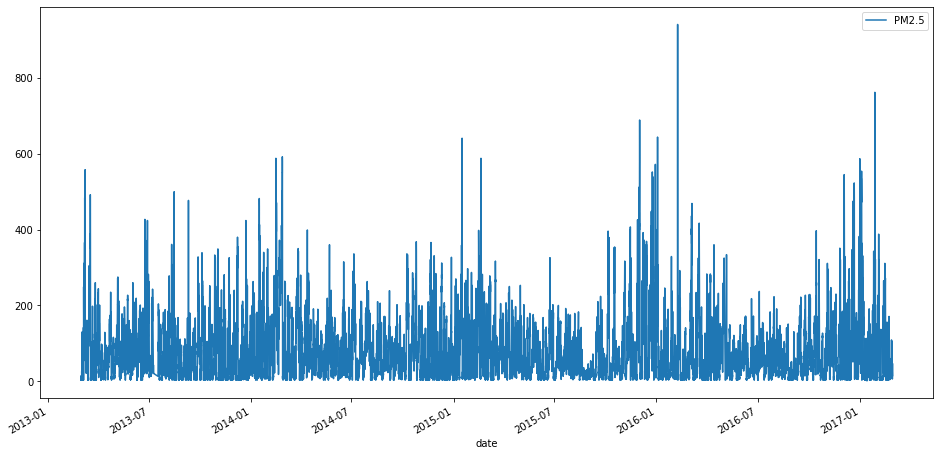

In [61]:
# see how pm2.5 change with time

data5 = data4.drop(['RH', 'RAIN', 'wd', 'WSPM'], axis=1)
data5.plot(figsize=(16,8))

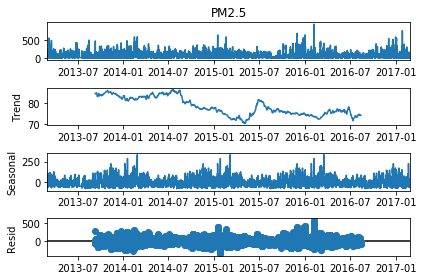

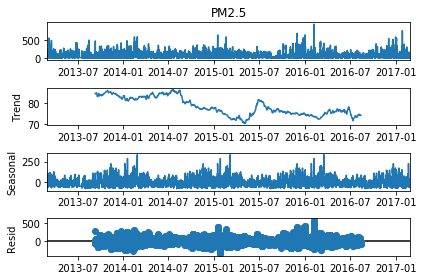

In [62]:
# seems like it has some seasonality?

from statsmodels.tsa.seasonal import seasonal_decompose
# period is 24*365 = 8760
decomposeResult = seasonal_decompose(data5['PM2.5'], period = 8760)
decomposeResult.plot()

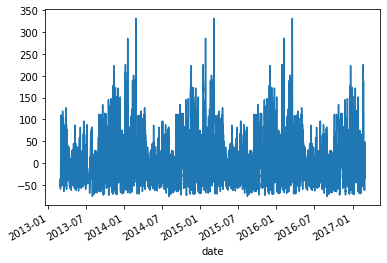

In [63]:
decomposeResult.seasonal.plot()

In [64]:
# seems like PM2.5 is higher in winter period, which is reasonable.(heating)

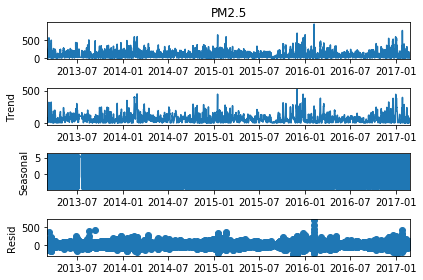

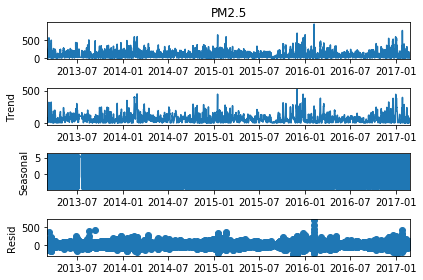

In [65]:
# if there is a daily pattern ?

decomposeResult_daily = seasonal_decompose(data5['PM2.5'], period = 24)
decomposeResult_daily.plot()

C:\StudySoftware\Anaconda\envs\info6105_new\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\StudySoftware\Anaconda\envs\info6105_new\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\StudySoftware\Anaconda\envs\info6105_new\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

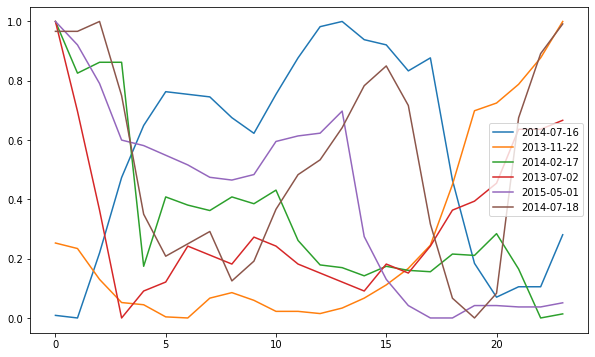

In [66]:
# seems like no seasonality?
# try to randomly pick up some daily data and normalize it, to see if they have some trend

from datetime import timedelta
from sklearn import preprocessing

day_lapse = np.random.randint(1, 1200, size=6) 
scaler = preprocessing.MinMaxScaler()


for lapse in day_lapse:
    # get random day
    date = data5.index[0] + timedelta(days=int(lapse))
    datestring = date.strftime('%Y-%m-%d')
    # selected data within this day
    df_daily = data5[data5.index.strftime('%Y-%m-%d') == datestring]
        # print(df_daily)
    # normalize data
    scaled = scaler.fit_transform(df_daily)
    df_daily['PM2.5'] = scaled
    df_daily.rename(columns={'PM2.5':datestring },inplace=True)
    df_daily.reset_index(inplace=True)
    df_daily.drop(columns=['date'], inplace=True)
        # print(df_daily)
    # plot data
    df_daily[datestring].plot(legend=True, figsize=(10,6))
    
    



In [67]:
# it seems like there is no daily pattern??

# plot PM2.5 with different weather condition (normalize all columns)

data6 = data4.drop(columns=['wd'])
data6_n =((data6-data6.min())/(data6.max()-data6.min()))
data6_n

,PM2.5,RAIN,WSPM,RH
date,,,,
2013-03-01 00:00:00,0.001065,0.0,0.726562,0.168194
2013-03-01 01:00:00,0.010650,0.0,0.734375,0.156371
2013-03-01 02:00:00,0.012780,0.0,0.671875,0.135409
2013-03-01 03:00:00,0.010650,0.0,0.515625,0.135930
2013-03-01 04:00:00,0.010650,0.0,0.351562,0.147119
...,...,...,...,...
2017-02-28 19:00:00,0.026624,0.0,0.140625,0.146574
2017-02-28 20:00:00,0.047923,0.0,0.117188,0.198746
2017-02-28 21:00:00,0.017039,0.0,0.132812,0.158044


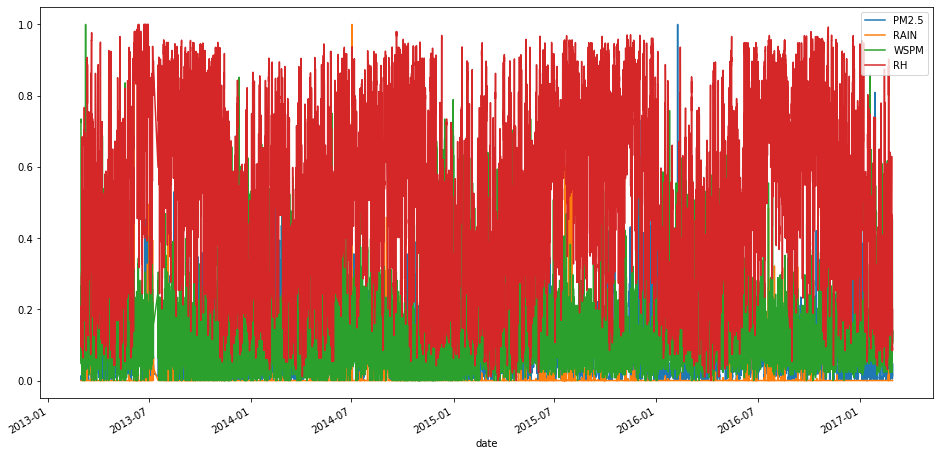

In [71]:
data6_n.plot(figsize=(16,8))

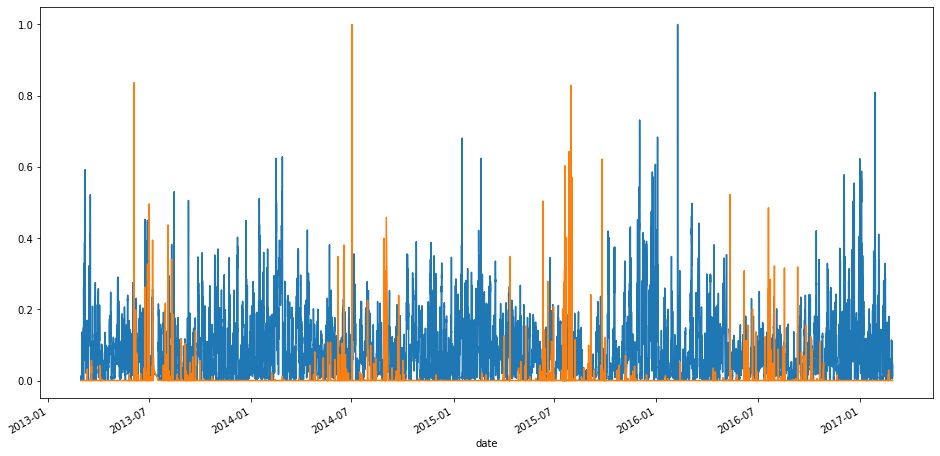

In [69]:
data6_n['PM2.5'].plot(figsize=(16,8))
data6_n['RAIN'].plot()

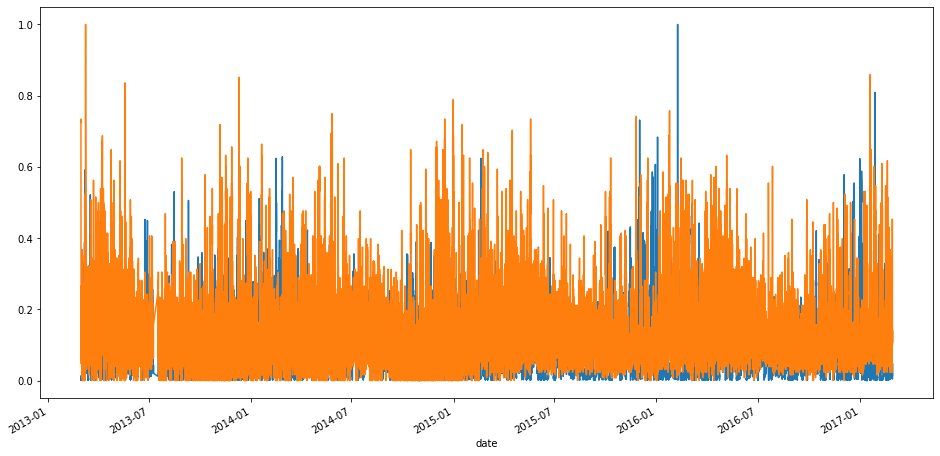

In [70]:
data6_n['PM2.5'].plot(figsize=(16,8))
data6_n['WSPM'].plot()